# Homework: Final Project

$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\hv}{\mathbf{h}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\zerov}{\mathbf{0}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\Hm}{\mathbf{H}}
\newcommand{\Idm}{\mathbf{I}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
\newcommand{\xspace}{\mathcal{X}}
\newcommand{\yspace}{\mathcal{Y}}
\newcommand{\ind}{\perp\!\!\!\!\!\perp} 
$

## Name: <span style="color:blue"> *Soham Pradhan* </span>

## Utils

In [1]:
from typing import List, Dict, Tuple, Callable, Union
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [2]:
weather_df = pd.read_csv("weather_data.csv") # India weather dataset
weather_df

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.00,76.9600,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.00,76.9600,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.00,76.9600,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.00,76.9600,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.00,76.9600,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5634117,5738569,Badaun,1275163,28.05,79.1167,2021-02-20 02:30:00+05:30,16.14,16.14,16.14,1015,1015,995,33,Clear,clear sky,0,2.31,285,North\n,Uttar Pradesh
5634118,5738570,Badaun,1275163,28.05,79.1167,2021-02-20 05:30:00+05:30,14.09,14.09,14.09,1015,1015,995,36,Clear,clear sky,0,1.53,302,North\n,Uttar Pradesh
5634119,5738571,Badaun,1275163,28.05,79.1167,2021-02-20 08:30:00+05:30,17.24,17.24,17.24,1017,1017,997,35,Clear,clear sky,0,2.13,241,North\n,Uttar Pradesh
5634120,5738572,Badaun,1275163,28.05,79.1167,2021-02-20 11:30:00+05:30,25.40,25.40,25.40,1018,1018,998,23,Clear,clear sky,0,2.89,271,North\n,Uttar Pradesh


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634122 entries, 0 to 5634121
Data columns (total 20 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   city_name    object 
 2   city_id      int64  
 3   latitude     float64
 4   longitude    float64
 5   dt_txt       object 
 6   temp         float64
 7   temp_min     float64
 8   temp_max     float64
 9   pressure     int64  
 10  sea_level    int64  
 11  grnd_level   int64  
 12  humidity     int64  
 13  main         object 
 14  description  object 
 15  clouds       int64  
 16  wind_speed   float64
 17  wind_degree  int64  
 18  region       object 
 19  state        object 
dtypes: float64(6), int64(8), object(6)
memory usage: 859.7+ MB


In [4]:
weather_df.describe()

,id,city_id,latitude,longitude,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,clouds,wind_speed,wind_degree
count,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06
mean,2.921440e+06,1.324752e+06,2.288693e+01,7.888581e+01,2.591592e+01,2.585627e+01,2.592403e+01,1.008137e+03,1.008132e+03,9.708137e+02,5.177615e+01,4.134311e+01,3.073992e+00,1.882795e+02
std,1.626528e+06,5.431463e+05,6.221208e+00,8.939075e+00,7.414541e+00,7.422143e+00,7.416251e+00,6.246186e+00,6.253577e+00,3.697419e+01,2.493578e+01,4.092916e+01,1.899257e+00,1.037190e+02
min,1.032530e+05,7.352640e+05,-8.591200e+00,5.950000e-02,-1.203000e+01,-1.203000e+01,-1.203000e+01,9.530000e+02,9.530000e+02,7.270000e+02,2.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00
25%,1.512951e+06,1.260637e+06,1.972000e+01,7.572000e+01,2.136000e+01,2.129000e+01,2.137000e+01,1.004000e+03,1.004000e+03,9.600000e+02,3.000000e+01,0.000000e+00,1.650000e+00,9.200000e+01
50%,2.921482e+06,1.269321e+06,2.383000e+01,7.773330e+01,2.630000e+01,2.624000e+01,2.630000e+01,1.009000e+03,1.009000e+03,9.790000e+02,5.100000e+01,2.900000e+01,2.700000e+00,2.070000e+02
75%,4.330043e+06,1.274693e+06,2.715000e+01,8.130000e+01,3.052000e+01,3.046000e+01,3.053000e+01,1.013000e+03,1.013000e+03,9.940000e+02,7.300000e+01,8.800000e+01,4.130000e+00,2.770000e+02
max,5.738573e+06,7.302854e+06,5.153000e+01,1.206710e+02,5.071000e+01,5.071000e+01,5.071000e+01,1.037000e+03,1.037000e+03,1.034000e+03,1.020000e+02,1.150000e+02,3.341000e+01,3.600000e+02


In [5]:
# matrix data
# only including the meaningful columns that will help with the prediction
X = weather_df[["id", "latitude", "longitude", "temp", "temp_min", "temp_max", "sea_level", "grnd_level", "humidity", "wind_speed", "wind_degree"]]
X

,id,latitude,longitude,temp,temp_min,temp_max,sea_level,grnd_level,humidity,wind_speed,wind_degree
0,103348,16.00,76.9600,23.45,23.45,23.45,1016,971,59,2.83,312
1,103349,16.00,76.9600,27.91,27.91,27.91,1015,971,42,1.95,297
2,103350,16.00,76.9600,31.14,31.14,31.14,1010,967,34,2.93,234
3,103351,16.00,76.9600,30.94,30.94,30.94,1010,966,32,1.15,246
4,103352,16.00,76.9600,26.14,26.14,26.14,1012,968,41,1.68,65
...,...,...,...,...,...,...,...,...,...,...,...
5634117,5738569,28.05,79.1167,16.14,16.14,16.14,1015,995,33,2.31,285
5634118,5738570,28.05,79.1167,14.09,14.09,14.09,1015,995,36,1.53,302
5634119,5738571,28.05,79.1167,17.24,17.24,17.24,1017,997,35,2.13,241
5634120,5738572,28.05,79.1167,25.40,25.40,25.40,1018,998,23,2.89,271


In [6]:
# Target data
# trying to predict the pressure based on the other values
y = weather_df["pressure"]
y

0          1016
1          1015
2          1010
3          1010
4          1012
           ... 
5634117    1015
5634118    1015
5634119    1017
5634120    1018
5634121    1014
Name: pressure, Length: 5634122, dtype: int64

## Visualization

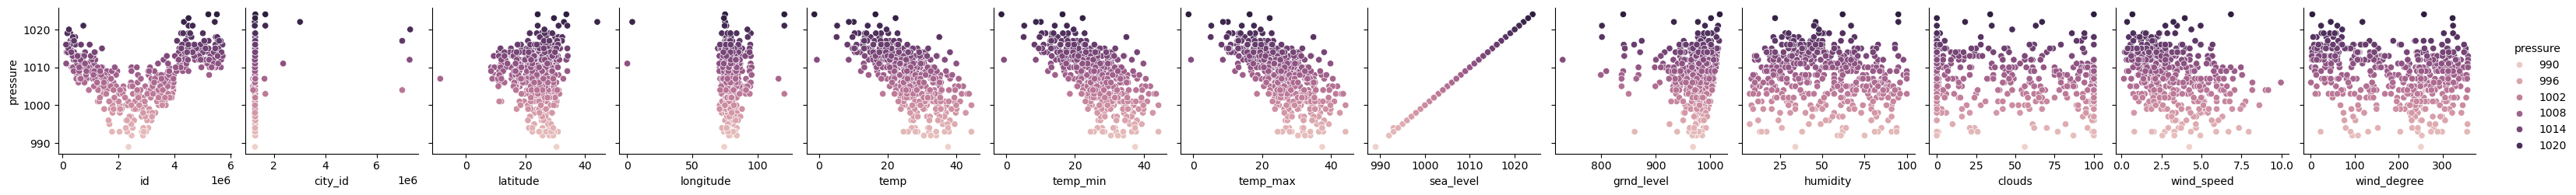

In [7]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(weather_df)), size=500, replace=False)
#these categories are not needed for comparison in the pairplot. Therefore they are dropped for easier computation
drop_weather_df = weather_df.drop(["city_name", "dt_txt", "main", "description", "region", "state"], axis=1) 
sns.pairplot(
    data=drop_weather_df.iloc[indices],
    y_vars=['pressure'],  
    x_vars=list(drop_weather_df.drop(columns=['pressure']).columns),  
    hue="pressure" 
)
plt.show()

# Linear Regression with OLS

## Data Preprocessing

### Data Splitting

In [8]:
from sklearn.model_selection import train_test_split

def get_train_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    assert isinstance(X, np.ndarray), f'`X` must be a NumPy array, got type {type(X)} instead.'
    assert isinstance(y, np.ndarray), f'`y` must be a NumPy array, got type {type(y)} instead.'
    
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
    
    return X_trn, y_trn, X_tst, y_tst

### Add Bias Term

In [9]:
def add_bias(X: np.ndarray) -> np.ndarray:
    """ Add bias term to input features.

        Args:
            X: Input feature data given as a matrix.

        Return: 
            Matrix where first column contains the bias term
    """
    bias = np.ones((X.shape[0], 1))

    # Stack the bias column as the first column of X
    result = np.hstack((bias, X))

    return result

### Putting it all together

In [10]:
def get_preprocessed_data() -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training and testing

        Return:
            A tuple of NumPy arrays where the first two indices 
            contain the training data and targets and the last two
            indicies contain the testing data and targets.
    """
    X_trn, y_trn, X_tst, y_tst = get_train_test_data(X.to_numpy(), y.to_numpy())
    
    X_trn = add_bias(X_trn)
    X_tst = add_bias(X_tst)
    
    return X_trn, y_trn, X_tst, y_tst

## Metrics

In [11]:
def sse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the sum of squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the SSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    result = np.sum((y_hat - y)**2)
    
    return result

In [12]:
def mse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the mean square error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the MSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    result = np.mean((y_hat - y)**2)
    
    return result

In [13]:
def rmse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the root means squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the RMSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    result = np.sqrt(np.mean((y_hat - y)**2))
    
    return result

## OLS Class

In [14]:
class OrdinaryLeastSquares():
    """ Perfroms ordinary least squares regression
    
        Attributes:
            w: The weights learned by using the normal equation

    """
    def __init__(self):
        self.w  = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Train OLS to learn optimal weights

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector
                
            Return:
                The class's own object reference. 
        """
        # TODO 9.1
        p_inv = np.linalg.pinv(X)
        self.w = p_inv @ y
        
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Return:
                Returns a 1D vector of predictions for each data sample in X
        """
        # TODO 9.2
        
        return X @ self.w

## Predicting on India Weather Data

In [15]:
# Get preprocessed data
X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()
# Initialize OrdinaryLeastSquares object
ols = OrdinaryLeastSquares()
# Train OLS
ols.fit(X_trn, y_trn)
# Compute test predictions
y_tst_hat = ols.predict(X_tst)

## Plotting Predictions

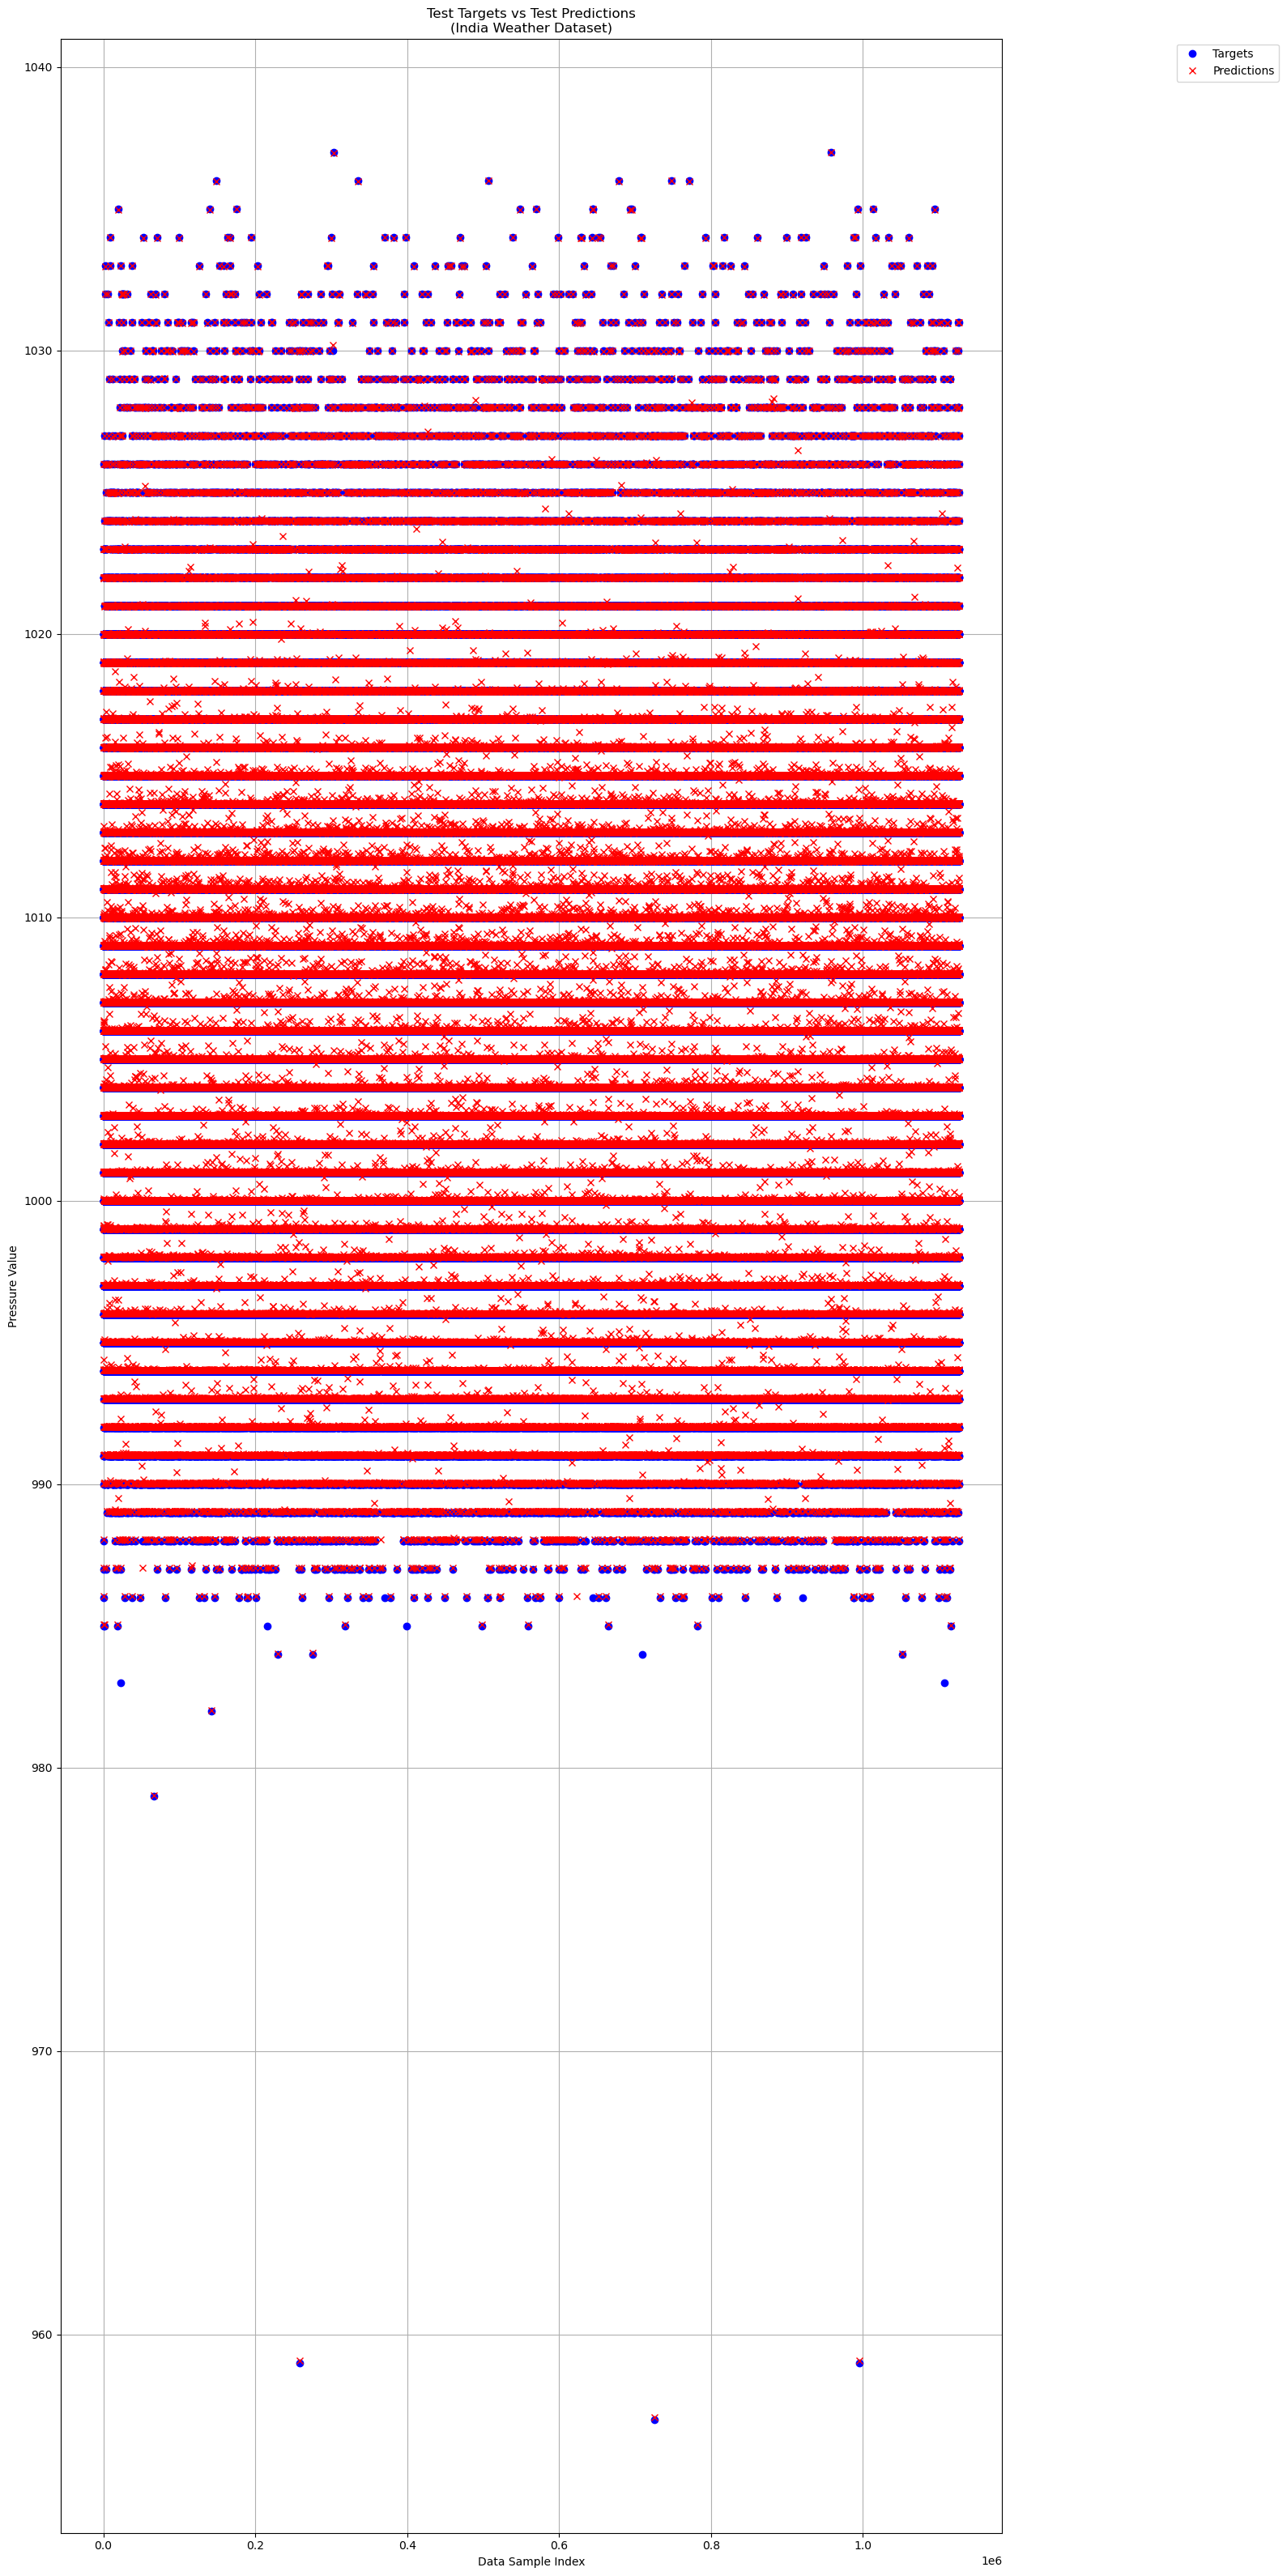

In [16]:
plt.figure(figsize=(15, 40))
plt.plot(y_tst, 'ob', label='Targets')  
plt.plot(y_tst_hat, 'xr', label='Predictions')  
plt.xlabel("Data Sample Index")
plt.ylabel("Pressure Value")
plt.title("Test Targets vs Test Predictions\n(India Weather Dataset)")
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.grid(True)
plt.show()

## Scores

In [17]:
from sklearn.metrics import accuracy_score

tst_sse = sse(y_tst, y_tst_hat)

tst_mse = mse(y_tst, y_tst_hat)

tst_rmse = rmse(y_tst, y_tst_hat)

print(f"Test SSE: {tst_sse}")
print(f"Test MSE: {tst_mse}")
print(f"Test RMSE (error in original units): {tst_rmse}")

Test SSE: 18060.10052304714
Test MSE: 0.01602742264597177
Test RMSE (error in original units): 0.1265994575263724


# Linear Regression with Gradient Descent and LMS

## Data Preprocessing

### Standardization

In [18]:
class Standardize():
    """ Standize data based on mean and STD computed using training data

        Attributes:
            mean: Vector of means for each feature 

            std: Vector of STDs for each feature
            
    """
    def __init__(self):
        self.mean: np.ndarray = None
        self.std: np.ndarray = None
    
    def fit(self, X: np.ndarray) -> object:
        """ Computes the mean and std using the training data.

            Args:
                X: training data given as a matrix

            Return:
                Reference to object's instance
        """
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        
        return self
        
    def transform(self, X: np.ndarray) -> np.ndarray:
        """ Transforms the passed data using standardization based on the 
            precomputed mean and STD.

            Args:
                X: Data given as a matrix

            Returns:
                Standardized matrix of data
        """
        std_result = (X - self.mean) / self.std
        
        return std_result

### Putting it Together

In [19]:
from sklearn.model_selection import train_test_split
def get_preprocessed_data():
    """ Gets preprocessed data for training and testing

        Returns:
            A tuple of NumPy arrays where the first two indices 
            contain the training data and targets and the last two
            indicies contain the testing data and targets. Targets
            should be 2D column vectors.
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(
        X.to_numpy(), 
        y.to_numpy(), 
        test_size=0.2, 
        train_size=0.8, 
        random_state=42
    )
    
    std = Standardize()
    std.fit(X_trn)
    X_trn = std.transform(X_trn)
    X_tst = std.transform(X_tst)
    
    X_trn = np.hstack([np.ones((X_trn.shape[0], 1)), X_trn])
    X_tst = np.hstack([np.ones((X_tst.shape[0], 1)), X_tst])

    # Reshape targets to be 2D column vectors
    return X_trn, y_trn.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

## Batching

In [20]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indices
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    
    np.random.shuffle(indices)

    batches = []
    for i in range(0, data_len, batch_size):
        batches.append(indices[i: i + batch_size])
    
    return batches

## Metrics

In [21]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

## Coding the LMS Class

In [22]:
class LeastMeanSquares():
    """ Performs regression using least mean squares (gradient descent)
    
        Attributes:

            alpha: learning rate or step size
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            w: 2D column vector of weights 

            trn_error: Stores the training error for each epoch.
    """

    def __init__(
        self, 
        alpha: float ,
        batch_size: int,
        seed: int = 0,
        epochs: int = 1,
    ):
        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        self.w: np.ndarray = None
        self.trn_error: list = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Train LMS to learn weights

            Args:
                X: Training data given as a matrix

                y: Training labels given as a 2D column vector
                
            Returns:
                The class's own object reference. 
        """
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training error
        self.trn_error = []
        
        M = X.shape[1]
        self.w = np.random.rand(M, 1)
        
        
        # Loop over training epochs
        for e in range(self.epochs):
            batches = get_batches(X.shape[0], self.batch_size)
            
            # Loop over batched data indices
            for b in batches:
                X_batch = X[b]
                y_batch = y[b]
                
                mean_grad = (X_batch.T @ ((X_batch @ self.w) - y_batch)) / len(b)
            
                self.w -= self.alpha * mean_grad  # Gradient descent update of weights

            # Compute training error for current epoch
            preds = self.predict(X)
            trn_error = rmse(y, preds)
            self.trn_error.append(trn_error)
            
        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Data given as a matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        return X @ self.w

## India Weather Dataset Prediction using LMS

mse training value:  0.018458966954456844
rmse training value:  0.13586378087796924
mse testing value:  0.016103922723744245
rmse testing value:  0.12690123216007101


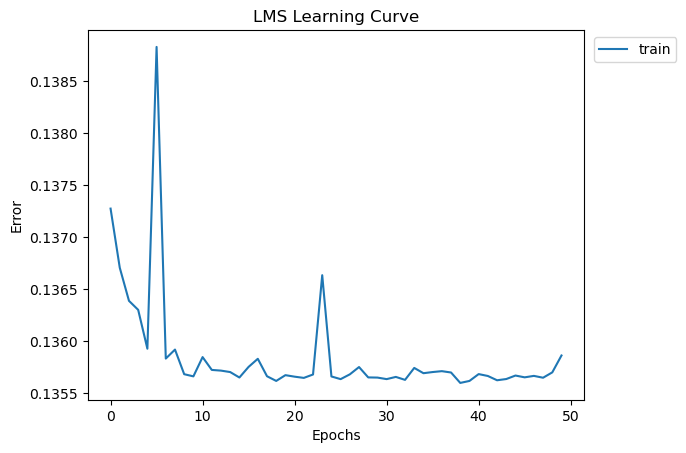

In [23]:
# Get training and testing data
X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()

lms = LeastMeanSquares(
    alpha=0.01,
    batch_size=32,
    seed=1,
    epochs=50
)


lms.fit(X_trn, y_trn)

# Compute training predictions and metrics
y_trn_predict = lms.predict(X_trn)
trn_mse = mse(y_trn, y_trn_predict)
trn_rmse = rmse(y_trn, y_trn_predict)
print("mse training value: ", trn_mse)
print("rmse training value: ", trn_rmse)

# Compute testing predictions and metrics
y_tst_predict = lms.predict(X_tst)
tst_mse = mse(y_tst, y_tst_predict)
tst_rmse = rmse(y_tst, y_tst_predict)
print("mse testing value: ", tst_mse)
print("rmse testing value: ", tst_rmse)

# ## Plotting Code ###
plt.plot(lms.trn_error, label='train')
plt.title("LMS Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(bbox_to_anchor=(1.2, 1.00))
plt.show()